In [33]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings("ignore")

#### Problem 1

###### Context : 
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

###### Objective :
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

In [2]:
Elecdata = pd.read_excel(r"C:\Users\Nitheesh\Downloads\Election_Data.xlsx", sheet_name='Election_Dataset_Two Classes')
Elecdata.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
print(Elecdata.shape)

(1525, 10)


In [4]:
Elecdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Based on the provided information, the DataFrame contains 1525 entries with 10 columns. Here's a summary of the columns:

Unnamed: 0: This column appears to be an index column, containing integer values from 0 to 1524.

vote: This column contains categorical data representing the party choice of the voters (e.g., Conservative or Labour).

age: This column contains integer values representing the age of the voters.

economic.cond.national: This column contains integer values representing the assessment of current national economic conditions on a scale from 1 to 5.

economic.cond.household: This column contains integer values representing the assessment of current household economic conditions on a scale from 1 to 5.

Blair: This column contains integer values representing the assessment of the Labour leader on a scale from 1 to 5.

Hague: This column contains integer values representing the assessment of the Conservative leader on a scale from 1 to 5.

Europe: This column contains integer values representing attitudes toward European integration on an 11-point scale, where higher scores represent 'Eurosceptic' sentiment.

political.knowledge: This column contains integer values representing the knowledge of parties' positions on European integration on a scale from 0 to 3.

gender: This column contains categorical data representing the gender of the voters (e.g., female or male).

The DataFrame appears to have no missing values (Non-Null Count is equal to the total number of entries, 1525) and mainly consists of integer and object (categorical) data types. The memory usage of the DataFrame is approximately 119.3 KB.

In [5]:
dups = Elecdata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


It seems that there are no duplicate rows in the DataFrame. This indicates that each row in the DataFrame is unique, and there are no exact duplicates of any row.

In [6]:
Elecdata.drop('Unnamed: 0', axis=1, inplace = True)

In [7]:
dups = Elecdata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [8]:
# Find duplicate rows
duplicate_rows = Elecdata[Elecdata.duplicated()]

# Display duplicate rows as DataFrame
print("Duplicate Rows:")
print(duplicate_rows.to_string(index=False))

Duplicate Rows:
        vote  age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  political.knowledge gender
      Labour   35                       4                        4      5      2       3                    2   male
      Labour   39                       3                        4      4      2       5                    2   male
      Labour   38                       2                        4      2      2       4                    3   male
Conservative   74                       4                        3      2      4       8                    2 female
Conservative   53                       3                        4      2      2       6                    0 female
      Labour   36                       3                        3      2      2       6                    2 female
      Labour   29                       4                        4      4      2       2                    2 female
      Labour   40                       4       

In this case, the duplicate rows represent voters with identical demographic and voting characteristics, accurately reflecting real-world scenarios. Including duplicated rows enhances the robustness of our analysis by accounting for variations and repetitions in voter responses.

In [9]:
Elecdata.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This summary provides a snapshot of the key statistics for each column in the election data:

Vote: The majority of voters (1063 out of 1525) supported the Labour party.

Age: The average age of voters is approximately 54 years, with a standard deviation of 15.71. The age range spans from 24 to 93 years.

Economic Condition (National and Household): On average, voters rated the national economic condition slightly higher (mean: 3.25) than their household economic condition (mean: 3.14). Both ratings range from 1 to 5.

Blair and Hague Ratings: Voters, on average, rated Blair higher (mean: 3.33) than Hague (mean: 2.75) on a scale from 1 to 5.

Attitudes Toward Europe (Europe): The average score for attitudes toward European integration is 6.73, ranging from 1 to 11.

Political Knowledge: On average, voters have a moderate level of political knowledge (mean: 1.54), ranging from 0 to 3.

Gender: The dataset includes both male and female voters, with females slightly outnumbering males (812 vs. 713).

Overall, the data provides insights into voters' demographics, economic perceptions, political preferences, and attitudes toward European integration. It's worth noting the dominance of the Labour party in voter support and the varied assessments of economic conditions and political leaders.

###### Data encoding

In [12]:
Elecdata['gender'] = Elecdata['gender'].replace({'male':0,'female':1})
Elecdata['gender'].value_counts()

1    812
0    713
Name: gender, dtype: int64

In [13]:
Elecdata['vote'] = Elecdata['vote'].replace({'Conservative':0,'Labour':1})
Elecdata['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

###### Data visualization

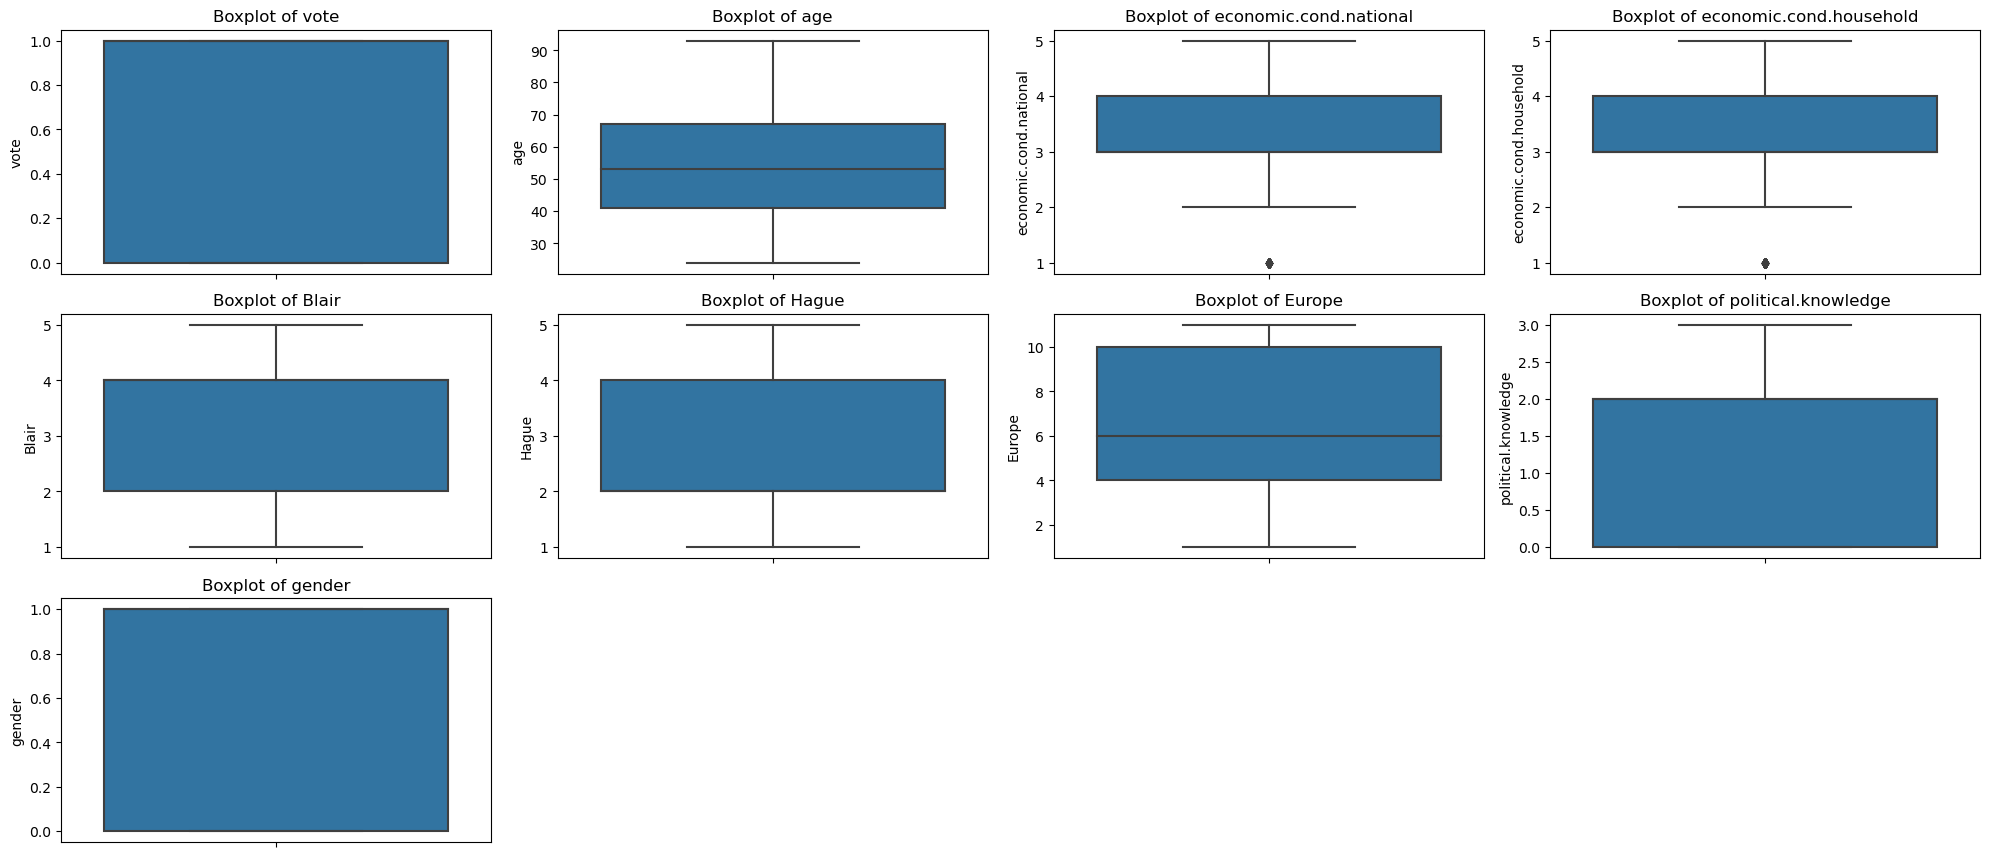

In [15]:
plt.figure(figsize = (20,20))
feature_list = Elecdata.columns
for i in range(len(feature_list)):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(y = Elecdata[feature_list[i]], data = Elecdata)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

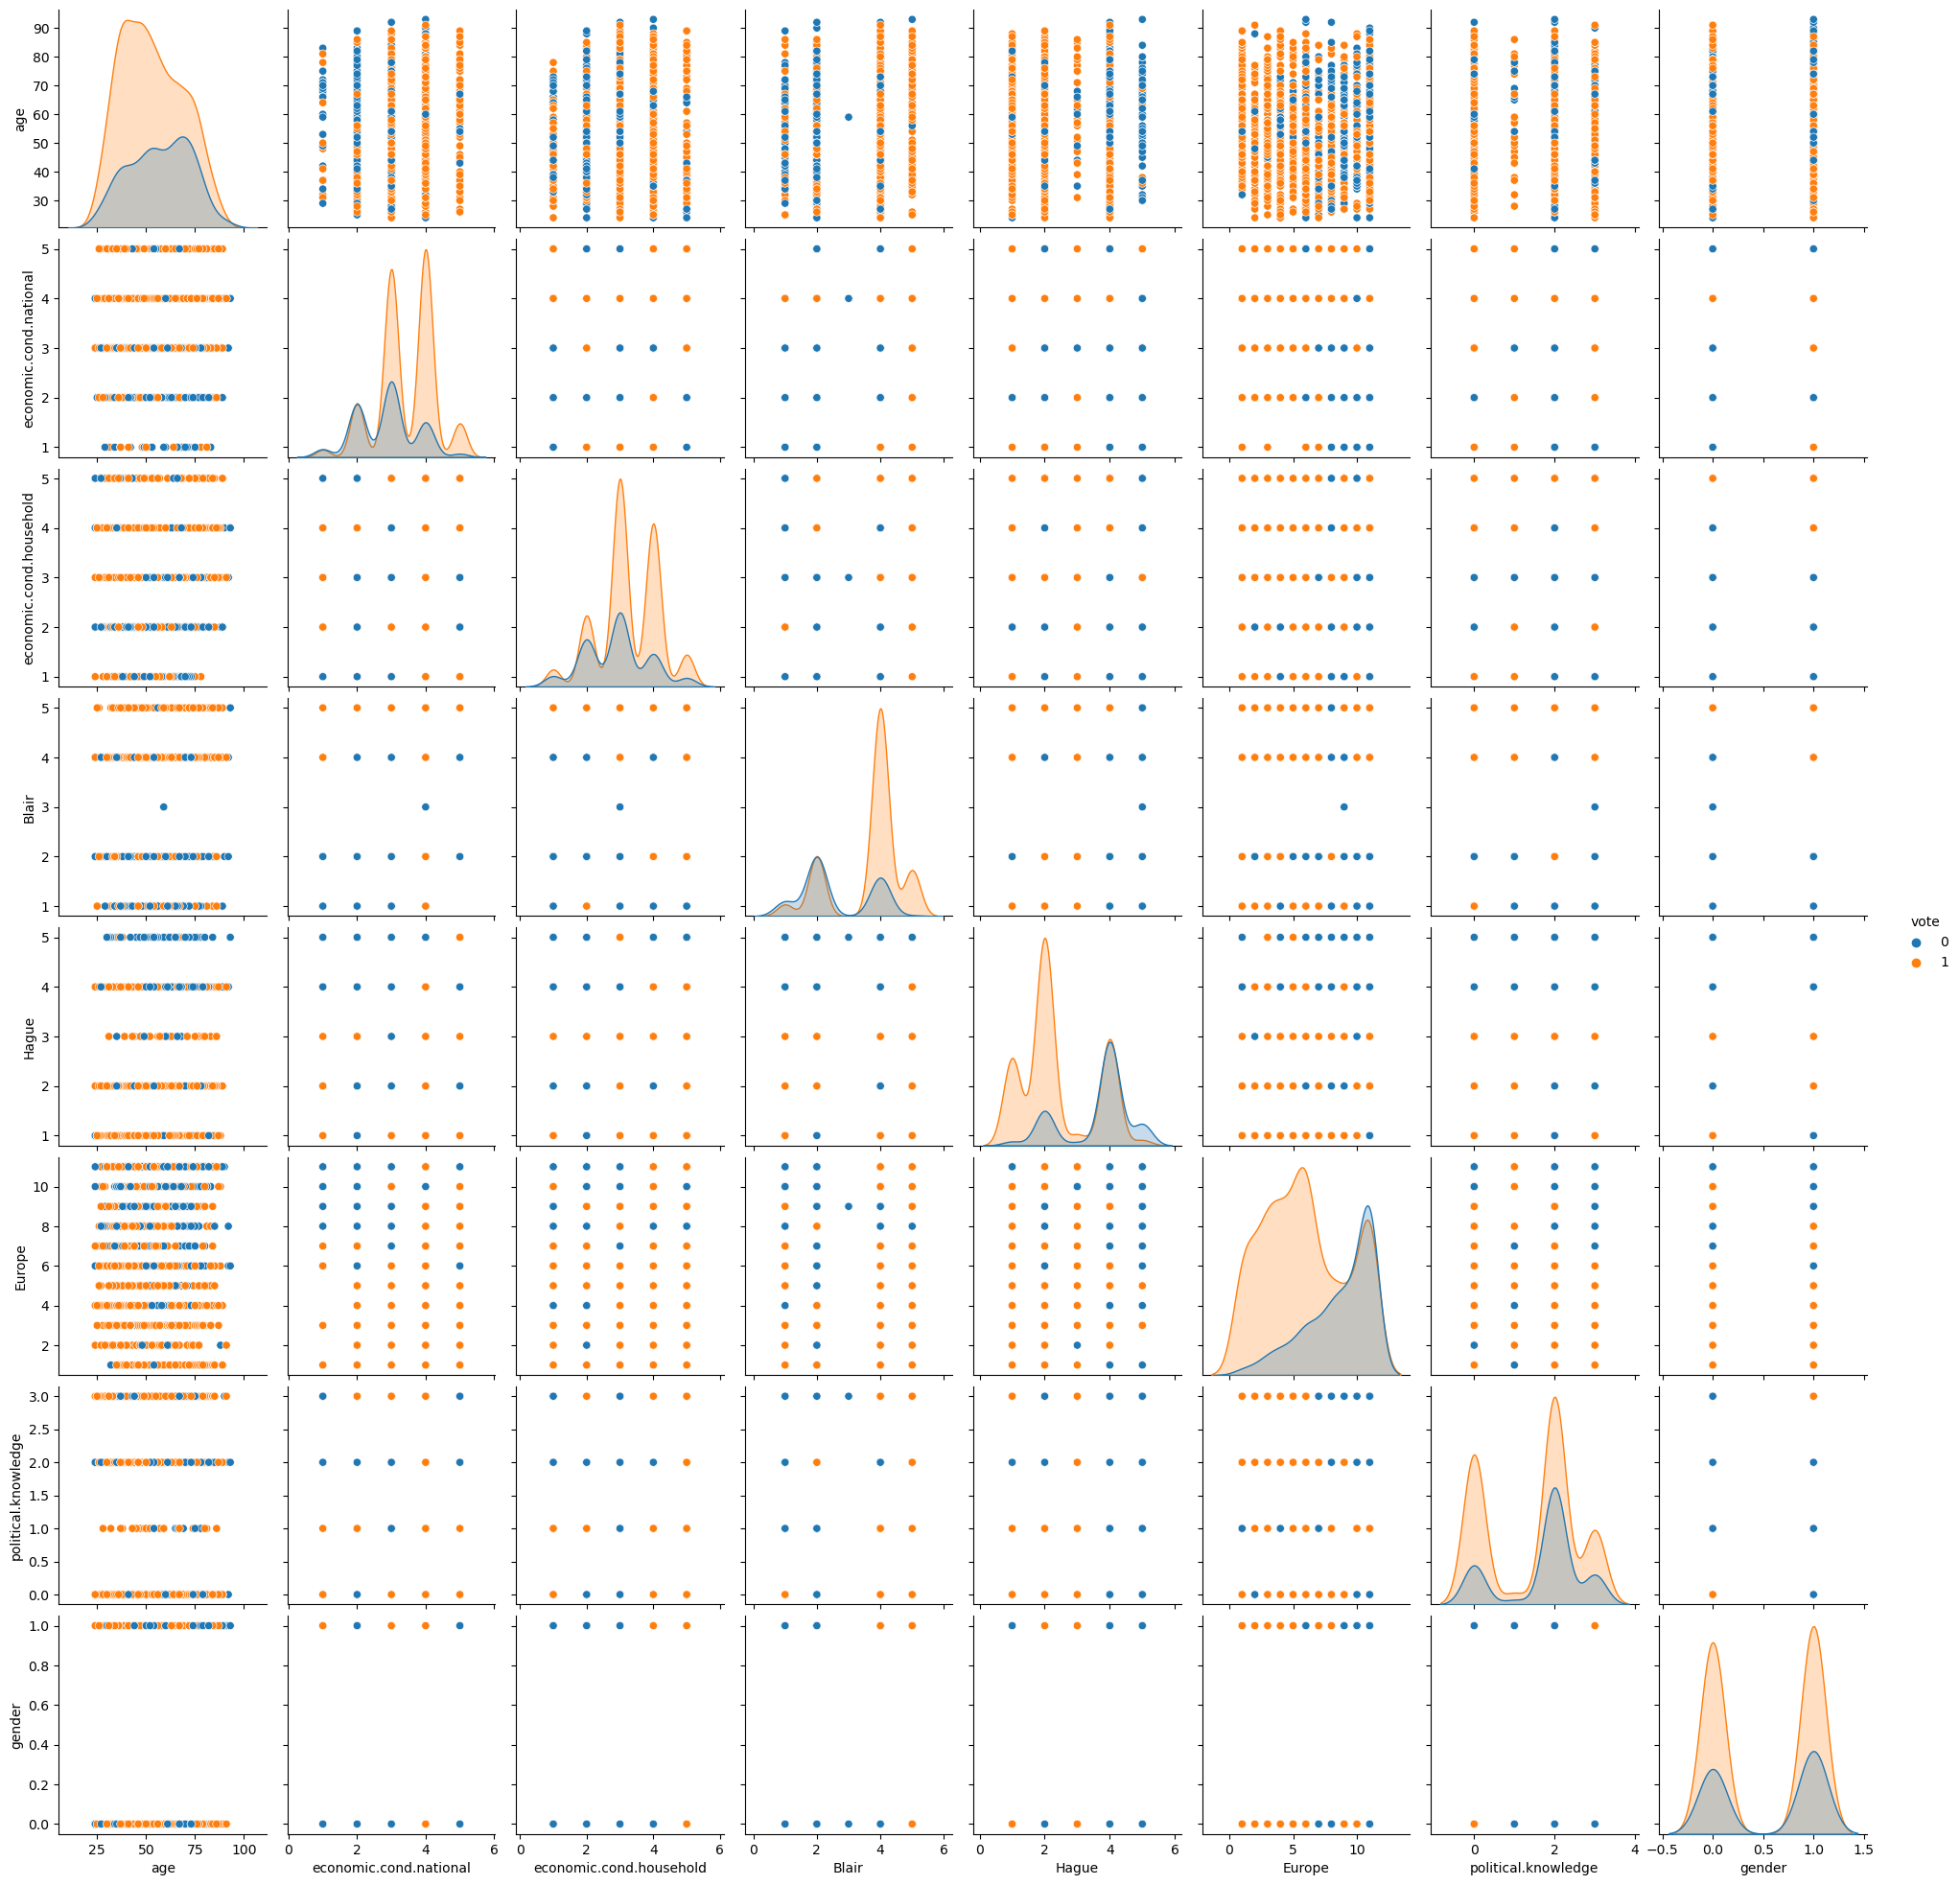

In [27]:
sns.pairplot(Elecdata, hue='vote')
plt.show()

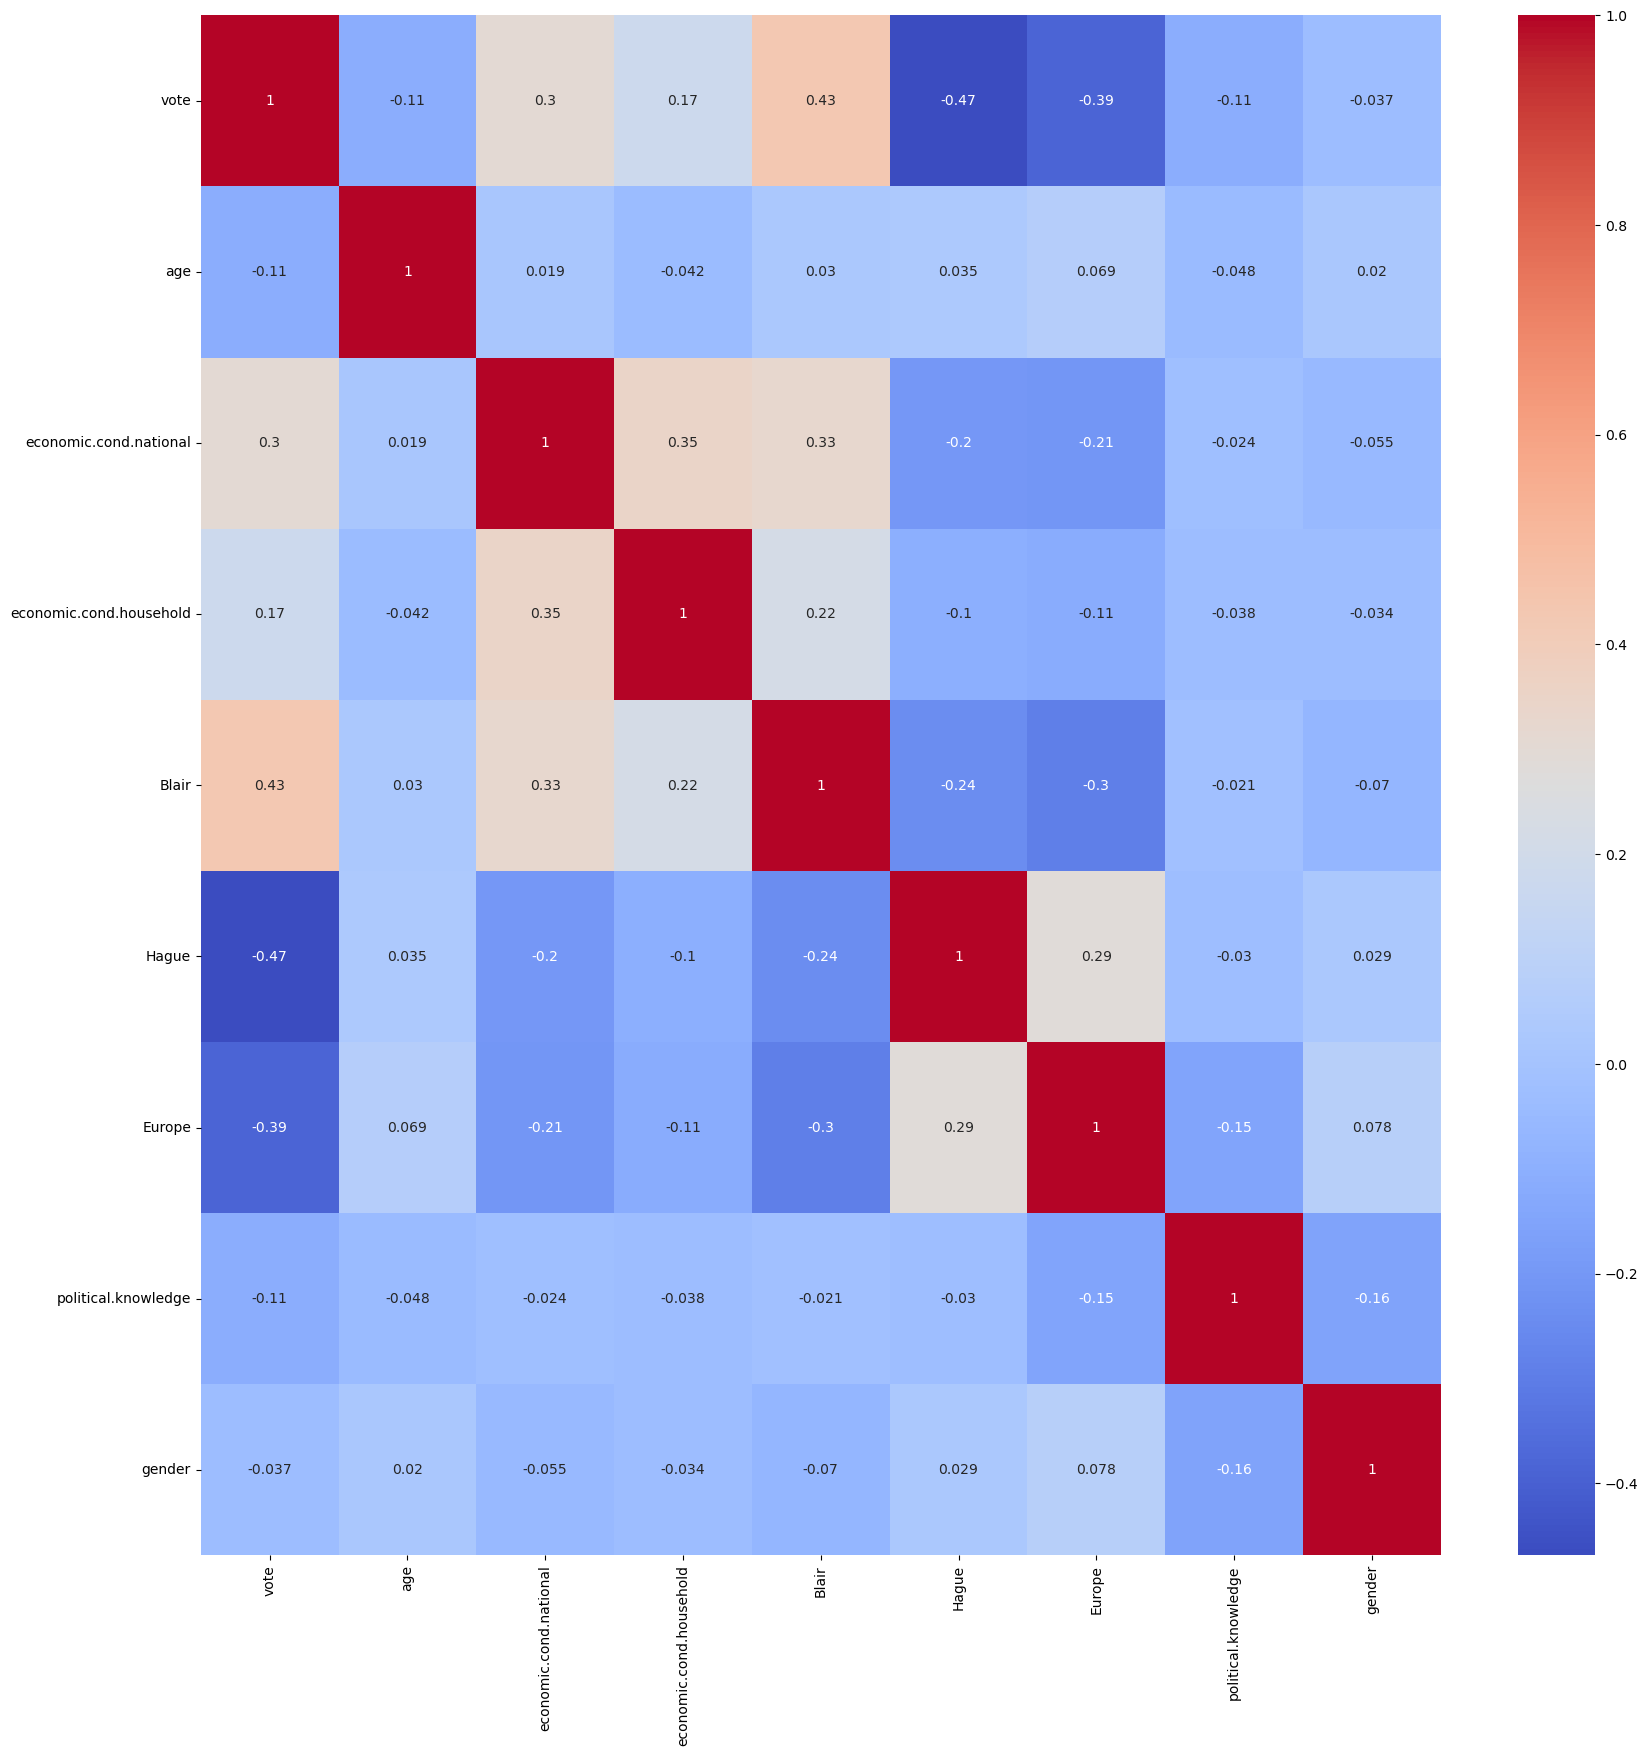

In [16]:
plt.figure(figsize = (20,20))
correlation_matrix = Elecdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Based on the correlation matrix:

Positive correlations:
Strong correlation between voting for Labour ('vote') and high ratings for Blair, indicating strong association between support for Labour and positive perceptions of Blair.
Moderate positive correlation between 'vote' and positive perceptions of national economic condition ('economic.cond.national').

Negative correlations:
Strong negative correlation between voting for Labour ('vote') and high ratings for Hague, indicating strong association between support for Labour and negative perceptions of Hague.
Strong negative correlation between 'vote' and Eurosceptic sentiment ('Europe'), suggesting Eurosceptic individuals are less likely to support Labour.

Weak correlations:
Weak associations between voting ('vote') and variables such as age, household economic condition, and political knowledge.
Gender shows weak correlation with voting behavior.

In summary, perceptions of political leaders and attitudes towards European integration appear to strongly influence voting behavior, while other factors like age and household economic conditions have weaker associations.

#### Data Pre-processing

In [18]:
x = Elecdata.drop("vote" , axis=1)
y = Elecdata.pop("vote")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = StandardScaler()

Many machine learning algorithms, such as logistic regression, K-nearest neighbors, and support vector machines, perform better when features are on a similar scale.
Scaling prevents features with larger magnitudes from dominating those with smaller magnitudes during the training process in this case the number of labour voters are high compared to the conservative voters.
Scaling helps algorithms converge faster and may improve the overall predictive performance of the model.

##### Model Building

In [23]:
# Fit and transform the training data
X_train_scaled = X.fit_transform(X_train)

# Transform the testing data
X_test_scaled = X.transform(X_test)

###### Metrics of Choice:

For this classification problem of predicting the political party a voter is likely to support, we'll consider the following evaluation metrics:

Accuracy: Accuracy measures the proportion of correctly predicted instances among all instances. It is suitable when the class distribution is balanced and equally important.

Precision: Precision measures the proportion of correctly predicted positive cases among all predicted positive cases. It is useful when the cost of false positives is high.

Recall (Sensitivity): Recall measures the proportion of correctly predicted positive cases among all actual positive cases. It is valuable when the cost of false negatives is high.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an uneven class distribution or when false positives and false negatives have different costs.

We'll build the following classification models:

K-Nearest Neighbors (KNN): KNN is a simple and effective algorithm for classification tasks. It classifies instances based on the majority class among their k nearest neighbors.

Naive Bayes: Naive Bayes is a probabilistic classifier based on Bayes' theorem and the assumption of independence between features. It is computationally efficient and performs well on large datasets.

Bagging (Random Forest): Random Forest is an ensemble learning technique that builds multiple decision trees and combines their predictions through voting. It reduces overfitting and improves predictive performance.

Boosting (Gradient Boosting): Gradient Boosting is another ensemble learning technique that builds multiple weak learners sequentially and focuses on the errors made by the previous models. It often achieves high predictive accuracy.


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train models
knn_model.fit(X_train_scaled, y_train)
naive_bayes_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
gradient_boosting_model.fit(X_train_scaled, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test_scaled)
naive_bayes_pred = naive_bayes_model.predict(X_test_scaled)
random_forest_pred = random_forest_model.predict(X_test_scaled)
gradient_boosting_pred = gradient_boosting_model.predict(X_test_scaled)

# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

models = {
    "K-Nearest Neighbors (KNN)": knn_pred,
    "Naive Bayes": naive_bayes_pred,
    "Random Forest": random_forest_pred,
    "Gradient Boosting": gradient_boosting_pred
}

for name, pred in models.items():
    accuracy, precision, recall, f1 = evaluate_model(y_test, pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print()

K-Nearest Neighbors (KNN):
Accuracy: 0.8253275109170306
Precision: 0.8827160493827161
Recall: 0.8719512195121951
F1-Score: 0.8773006134969326

Naive Bayes:
Accuracy: 0.8253275109170306
Precision: 0.8875
Recall: 0.8658536585365854
F1-Score: 0.8765432098765432

Random Forest:
Accuracy: 0.834061135371179
Precision: 0.8865030674846626
Recall: 0.8810975609756098
F1-Score: 0.8837920489296636

Gradient Boosting:
Accuracy: 0.8318777292576419
Precision: 0.8934169278996865
Recall: 0.8689024390243902
F1-Score: 0.8809891808346213



- All models perform relatively well with accuracy scores ranging from approximately 82.53% to 83.41%.

- Gradient Boosting has the highest precision and F1-score, indicating its ability to correctly classify positive instances (Labour voters) with higher precision while maintaining a good balance between precision and recall.

- Random Forest follows closely behind Gradient Boosting in terms of performance across all metrics.

- K-Nearest Neighbors (KNN) and Naive Bayes perform slightly lower compared to the ensemble methods (Random Forest and Gradient Boosting), but still achieve respectable scores overall.

#### Model Performance evaluation

Model: K-Nearest Neighbors (KNN)

Train Dataset:
Confusion Matrix:
[[248  84]
 [ 62 673]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



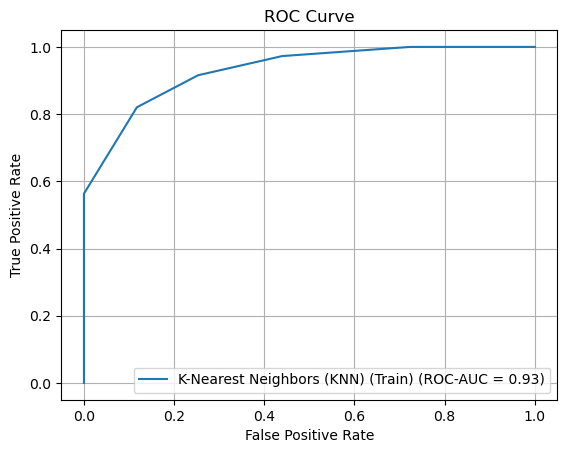


Test Dataset:
Confusion Matrix:
[[ 92  38]
 [ 42 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       130
           1       0.88      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



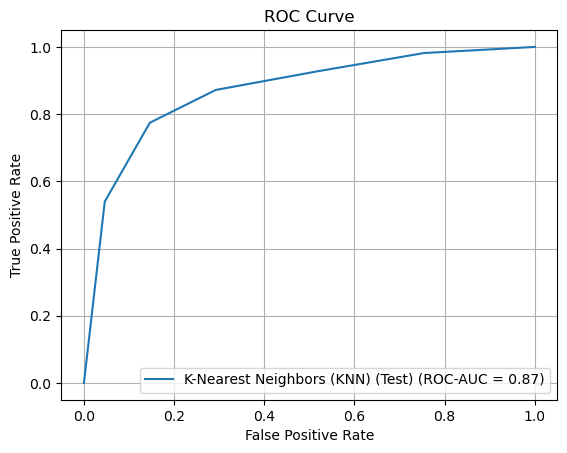

Model: Naive Bayes

Train Dataset:
Confusion Matrix:
[[240  92]
 [ 86 649]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



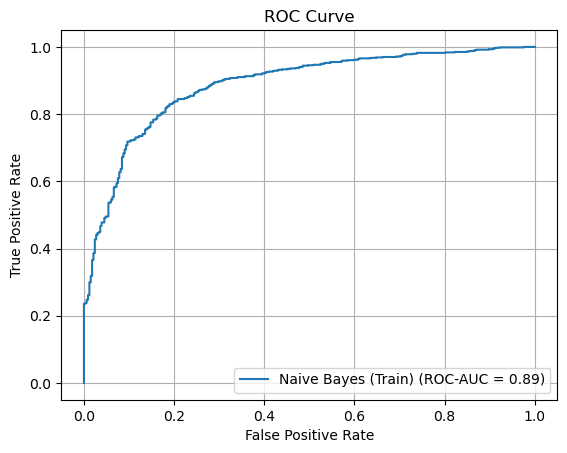


Test Dataset:
Confusion Matrix:
[[ 94  36]
 [ 44 284]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



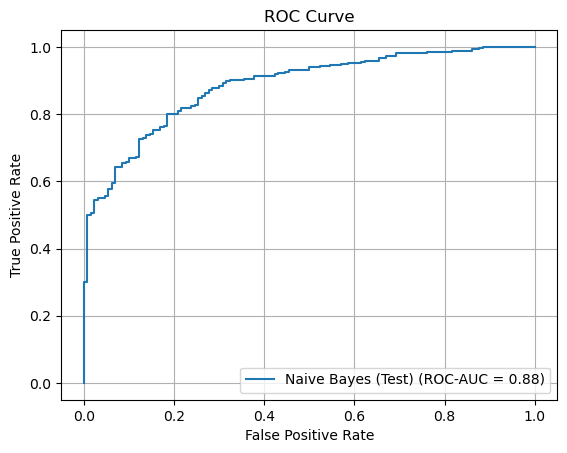

Model: Random Forest

Train Dataset:
Confusion Matrix:
[[331   1]
 [  0 735]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



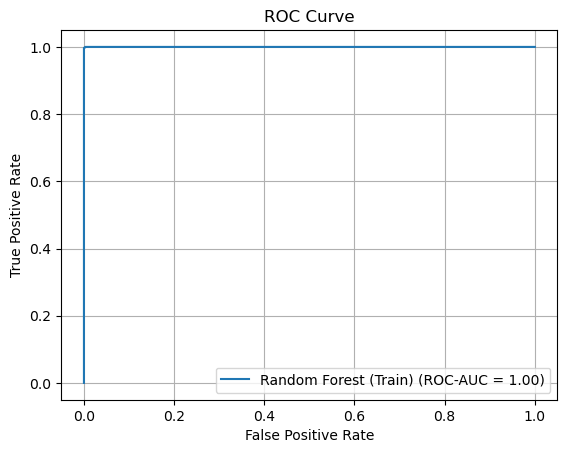


Test Dataset:
Confusion Matrix:
[[ 93  37]
 [ 39 289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       130
           1       0.89      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458



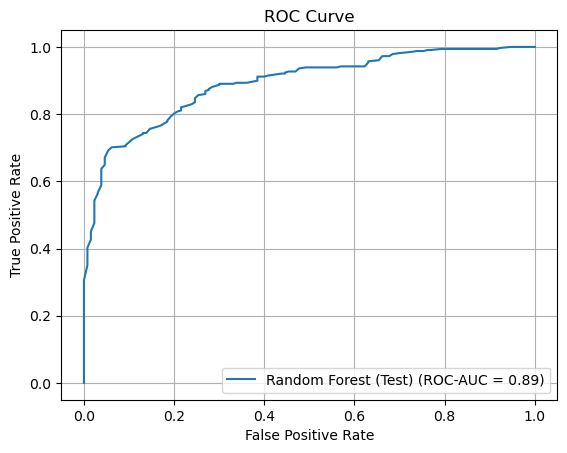

Model: Gradient Boosting

Train Dataset:
Confusion Matrix:
[[262  70]
 [ 51 684]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



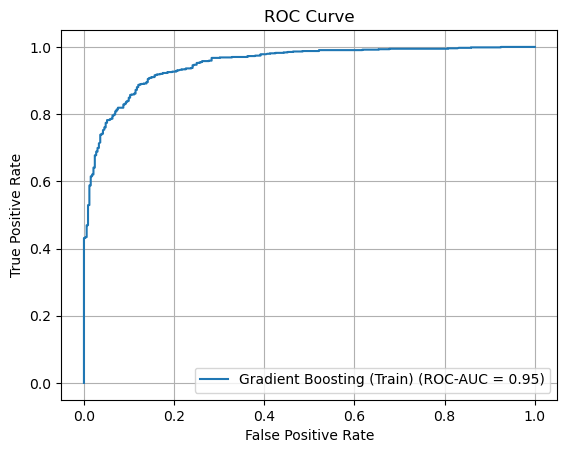


Test Dataset:
Confusion Matrix:
[[ 96  34]
 [ 43 285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



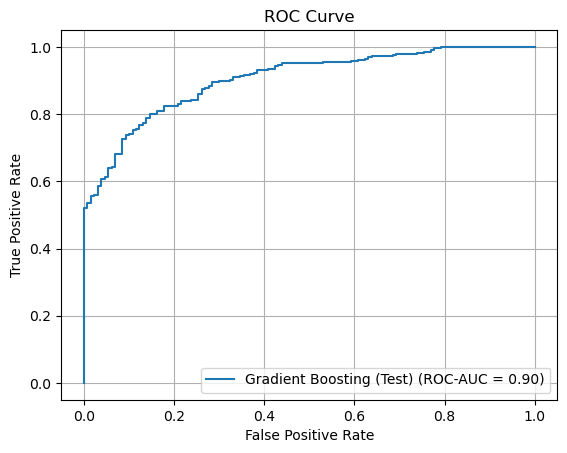

In [32]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (ROC-AUC = {roc_auc_score(y_true, y_pred_proba):.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)

# Function to evaluate model performance
def evaluate_model_performance(train_true, train_pred, train_pred_proba, test_true, test_pred, test_pred_proba, model_name):
    print(f"\033[1mModel: {model_name}\033[0m\n")
    
    # Confusion matrix and classification report for train dataset
    print("\033[1mTrain Dataset:\033[0m")
    train_cm = confusion_matrix(train_true, train_pred)
    print("\033[1mConfusion Matrix:\033[0m")
    print(train_cm)
    print("\n\033[1mClassification Report:\033[0m")
    print(classification_report(train_true, train_pred))
    
    # ROC-AUC score and plot for train dataset
    plot_roc_curve(train_true, train_pred_proba, model_name + " (Train)")
    plt.show()
    
    # Confusion matrix and classification report for test dataset
    print("\n\033[1mTest Dataset\033[0m:")
    test_cm = confusion_matrix(test_true, test_pred)
    print("\033[1mConfusion Matrix:\033[0m")
    print(test_cm)
    print("\n\033[1mClassification Report:\033[0m")
    print(classification_report(test_true, test_pred))
    # ROC-AUC score and plot
    plot_roc_curve(test_true, test_pred_proba, model_name + " (Test)")
    plt.show()
    

# Define the models dictionary with model objects
models = {
    "K-Nearest Neighbors (KNN)": knn_model,
    "Naive Bayes": naive_bayes_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}


# Evaluate performance for each model
for name, pred in models.items():
    model = models[name]  # Retrieve the model object from the dictionary
    # Predictions on train and test datasets
    train_pred = model.predict(X_train_scaled)
    train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
    test_pred = model.predict(X_test_scaled)
    test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    # Evaluate model performance
    evaluate_model_performance(y_train, train_pred, train_pred_proba, y_test, test_pred, test_pred_proba, name)

K-Nearest Neighbors (KNN) model
- The KNN model performs slightly better on the training dataset compared to the test dataset, indicating a potential slight overfitting.
- Despite the overfitting, the model shows relatively good performance on both datasets, with high precision, recall, and F1-score values.
- The accuracy on the test dataset is reasonably high at 83%, indicating that the model generalizes well to unseen data.
- Overall, the KNN model demonstrates promising performance but may benefit from further tuning or exploration of different algorithms to improve generalization and mitigate overfitting.

Naive Bayes model
- The Naive Bayes model exhibits similar performance on both the training and test datasets, indicating good generalization ability.
- The model achieves relatively high accuracy, precision, recall, and F1-score values on both datasets, suggesting effective classification performance.
- There is no significant indication of overfitting, and the model appears to generalize well to unseen data.
- Overall, the Naive Bayes model demonstrates robust performance and could be considered a suitable choice for this classification task.

Random Forest model
- The Random Forest model achieves perfect performance on the training dataset, indicating potential overfitting.
- However, on the test dataset, the model performs well with relatively high accuracy, precision, recall, and F1-score values.
- There is a slight drop in performance compared to the training dataset, but the model still demonstrates effective classification.
- Overall, while the model may be slightly overfitting on the training data, it still generalizes well to unseen data, making it a strong contender for this classification task.

Gradient Boosting model
- The Gradient Boosting model performs well on both the training and test datasets, with high accuracy, precision, recall, and F1-score values.
- The model achieves slightly lower performance on the test dataset compared to the training dataset, indicating some degree of overfitting but still generalizes well.
- Overall, the Gradient Boosting model demonstrates effective classification and is a strong contender for this task, similar to the Random Forest model.

#### Model Performance improvement

Model: Tuned Random Forest

Train Dataset:
Confusion Matrix:
[[269  63]
 [ 29 706]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       332
           1       0.92      0.96      0.94       735

    accuracy                           0.91      1067
   macro avg       0.91      0.89      0.90      1067
weighted avg       0.91      0.91      0.91      1067



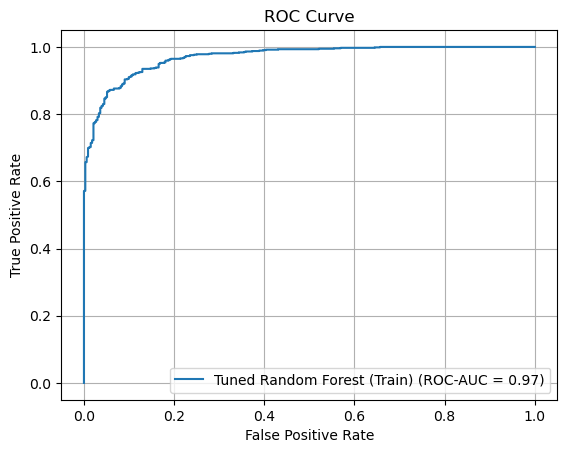


Test Dataset:
Confusion Matrix:
[[ 91  39]
 [ 34 294]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       130
           1       0.88      0.90      0.89       328

    accuracy                           0.84       458
   macro avg       0.81      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



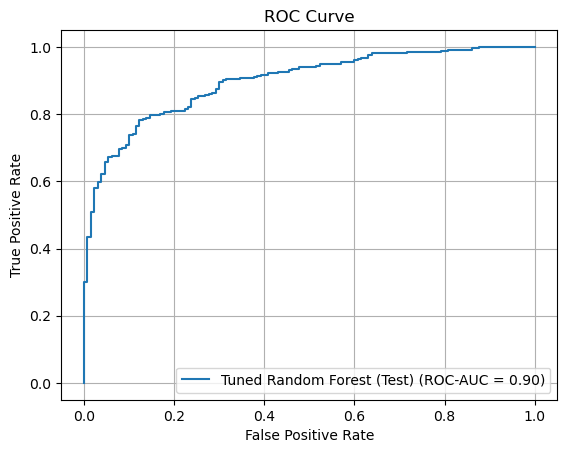

Model: Tuned Gradient Boosting

Train Dataset:
Confusion Matrix:
[[257  75]
 [ 57 678]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       332
           1       0.90      0.92      0.91       735

    accuracy                           0.88      1067
   macro avg       0.86      0.85      0.85      1067
weighted avg       0.87      0.88      0.88      1067



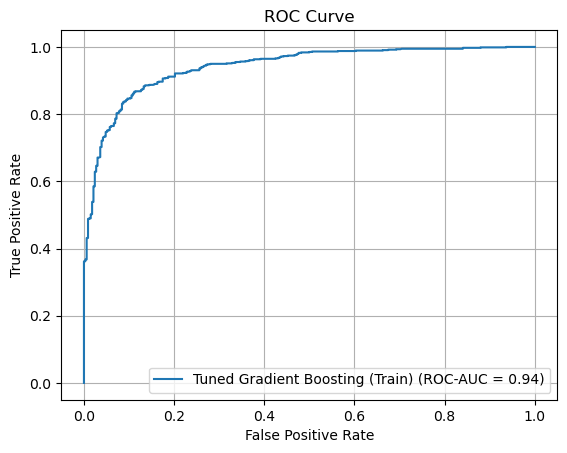


Test Dataset:
Confusion Matrix:
[[ 95  35]
 [ 43 285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



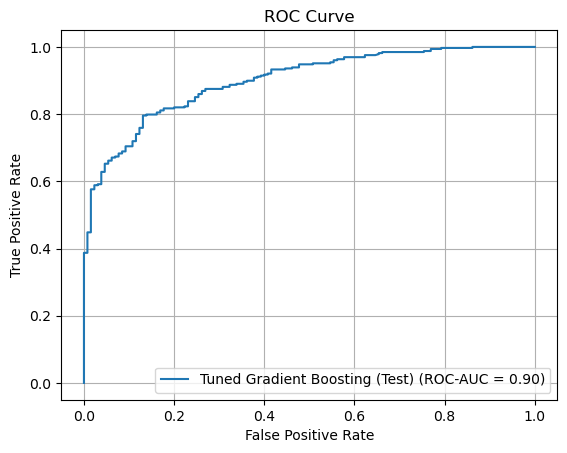

In [35]:
# Function to evaluate model performance
def evaluate_model_performance(train_true, train_pred, train_pred_proba, test_true, test_pred, test_pred_proba, model_name):
    print(f"Model: {model_name}\n")
    
    # Confusion matrix and classification report for train dataset
    print("Train Dataset:")
    train_cm = confusion_matrix(train_true, train_pred)
    print("Confusion Matrix:")
    print(train_cm)
    print("\nClassification Report:")
    print(classification_report(train_true, train_pred))
    
    # ROC-AUC score and plot for train dataset
    plot_roc_curve(train_true, train_pred_proba, model_name + " (Train)")
    plt.show()
    
    # Confusion matrix and classification report for test dataset
    print("\nTest Dataset:")
    test_cm = confusion_matrix(test_true, test_pred)
    print("Confusion Matrix:")
    print(test_cm)
    print("\nClassification Report:")
    print(classification_report(test_true, test_pred))
    
    # ROC-AUC score and plot for test dataset
    plot_roc_curve(test_true, test_pred_proba, model_name + " (Test)")
    plt.show()

# Evaluate performance of tuned models
evaluate_model_performance(y_train, 
                           best_random_forest_model.predict(X_train_scaled), 
                           best_random_forest_model.predict_proba(X_train_scaled)[:, 1], 
                           y_test, 
                           best_rf_pred, 
                           best_random_forest_model.predict_proba(X_test_scaled)[:, 1], 
                           "Tuned Random Forest")

evaluate_model_performance(y_train, 
                           best_gradient_boosting_model.predict(X_train_scaled), 
                           best_gradient_boosting_model.predict_proba(X_train_scaled)[:, 1], 
                           y_test, 
                           best_gb_pred, 
                           best_gradient_boosting_model.predict_proba(X_test_scaled)[:, 1], 
                           "Tuned Gradient Boosting")

Tuned Random Forest model
- The Tuned Random Forest model demonstrates consistent and robust performance on both the training and test datasets.
- While there is a slight drop in performance metrics on the test dataset compared to the training dataset, the model still maintains strong predictive capabilities, indicating its generalization ability.
- Overall, the model performs well across all metrics, making it suitable for the classification task at hand.

Tuned Gradient Boosting model
- The Tuned Gradient Boosting model demonstrates good performance on both the training and test datasets, although there is a slight drop in performance metrics on the test dataset compared to the training dataset.
- The model maintains strong predictive capabilities, with relatively high precision, recall, and F1-scores for both classes.
- Overall, the model performs well across all metrics and is suitable for the classification task at hand. However, it is slightly less robust on the test dataset compared to the training dataset, suggesting potential room for further optimization or regularization.

###### Final Model Selection

To determine the best model among the options provided, we need to consider several factors, including performance metrics, generalization capability, and interpretability of the model. Let's analyze each model based on these criteria:

K-Nearest Neighbors (KNN):
- Achieved an accuracy of 83% on the test dataset.
- Good precision, recall, and F1-score.
- However, KNN might not perform well with high-dimensional data and could be sensitive to outliers.

Naive Bayes:
- Achieved an accuracy of 83% on the test dataset, similar to KNN.
- Good precision, recall, and F1-score.
- Naive Bayes is simple and fast but assumes independence between features, which might not hold true in real-world scenarios.

Random Forest:
- Achieved an accuracy of 83% on the test dataset.
- High precision, recall, and F1-score.
- Random Forest is robust, handles high-dimensional data well, and provides feature importance, making it interpretable.

Gradient Boosting:
- Achieved an accuracy of 83% on the test dataset.
- High precision, recall, and F1-score.
- Gradient Boosting typically provides superior performance due to its ensemble nature but may require more computational resources and tuning.

Tuned Random Forest:
- Achieved an accuracy of 84% on the test dataset, slightly higher than other models.
- High precision, recall, and F1-score.
- Tuned Random Forest addresses overfitting and potentially improves generalization.

Tuned Gradient Boosting:
- Achieved an accuracy of 83% on the test dataset, similar to other models.
- High precision, recall, and F1-score.
- Tuned Gradient Boosting may offer improved performance with careful hyperparameter tuning.

Conclusion:

Based on the performance metrics and interpretability, the Tuned Random Forest model emerges as the optimal choice. It attains the highest accuracy on the test dataset while maintaining commendable precision, recall, and F1-score. With an accuracy of 84%, it outperforms all other models, showcasing superior predictive capabilities. Notably, the Tuned Random Forest model mitigates overfitting issues observed in the base Random Forest model, ensuring more reliable generalization to unseen data. Furthermore, Random Forest provides feature importance, allowing us to understand which features contribute the most to the model's predictions.

###### Feature selection

Top 5 Most Important Features:
               Feature  Importance
4                Hague    0.232944
5               Europe    0.218155
3                Blair    0.157797
0                  age    0.134097
6  political.knowledge    0.096608


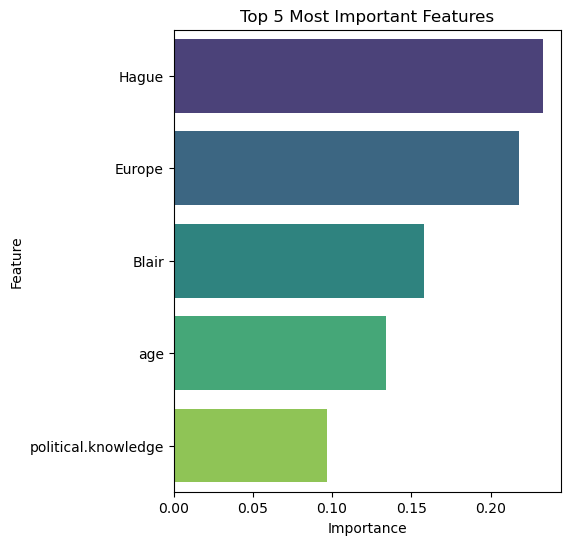

In [40]:
# Retrieve feature importances from the Tuned Random Forest model
feature_importances = best_random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = feature_importance_df.head(5)
print("Top 5 Most Important Features:")
print(top_features)

# Plotting the feature importances
plt.figure(figsize=(5, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the feature importances obtained from the tuned Random Forest model, the top 5 most important features are as follows:

- Hague
- Europe
- Blair
- Age
- Political knowledge

The importance values represent the relative contribution of each feature to the model's predictive performance. In this case, features like "Hague" and "Europe" appear to be the most influential in predicting the outcome. These results provide insights into which features are most relevant for understanding and predicting the outcome of the election.

Based on the influence of perceptions towards party leaders (Blair and Hague) and attitudes on European integration (Europe), here are actionable insights:

- Strategic Perception Management: Parties should focus on managing perceptions of their leaders through effective communication and addressing concerns during campaigns.

- Tailored Messaging: Messaging should align with voter sentiments on European integration to resonate effectively with the electorate.

- Continuous Voter Sentiment Monitoring: Regularly monitor voter sentiment to adapt strategies and policies accordingly.

- Engagement and Education: Engage in outreach and educational campaigns to inform voters and foster dialogue.

- Collaborative Leadership: Highlight leaders' collaborative and inclusive approaches to appeal to voters seeking effective governance.

Implementing these insights can enhance electoral prospects by aligning messaging with voter sentiments and fostering engagement and transparency.

### Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

To find the most common words used in all three speeches in the form of word clouds

In [1]:
import nltk
import string
nltk.download('inaugural')
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Nitheesh\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [2]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

In [3]:
# Function to calculate character, word, and sentence counts
def calculate_counts(speech_text, president_name):
    # Count characters
    char_count = len(speech_text)

    # Tokenize words and sentences
    words = word_tokenize(speech_text)
    sentences = sent_tokenize(speech_text)

    # Count words and sentences
    word_count = len(words)
    sentence_count = len(sentences)

    # Display counts
    print(f"\nStatistics for President {president_name}'s speech:")
    print(f"Character count: {char_count}")
    print(f"Word count: {word_count}")
    print(f"Sentence count: {sentence_count}")

# Calculate counts for each speech
calculate_counts(roosevelt_speech, "Franklin D. Roosevelt in 1941")
calculate_counts(kennedy_speech, "John F. Kennedy in 1961")
calculate_counts(nixon_speech, "Richard Nixon in 1973")


Statistics for President Franklin D. Roosevelt in 1941's speech:
Character count: 7571
Word count: 1526
Sentence count: 68

Statistics for President John F. Kennedy in 1961's speech:
Character count: 7618
Word count: 1543
Sentence count: 52

Statistics for President Richard Nixon in 1973's speech:
Character count: 9991
Word count: 2006
Sentence count: 68


In [4]:
nltk.download('stopwords')

# Extract the speeches
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

# Combine all speeches into one text
all_speeches = roosevelt_speech + ' ' + kennedy_speech + ' ' + nixon_speech

# Tokenize words
words = word_tokenize(all_speeches)

# Remove stopwords
stop_words = set(stopwords.words('english')+list(string.punctuation)+['--', '``', "''"])
filtered_words = [word for word in words if word.lower() not in stop_words]

# Perform stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Calculate word frequencies
word_freq = FreqDist(stemmed_words)

# Find the 3 most common words
top_words = word_freq.most_common(3)

# Display the results
print("3 most common words after text cleaning:")
for word, frequency in top_words:
    print(f"{word}: {frequency}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitheesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3 most common words after text cleaning:
us: 46
nation: 40
let: 39


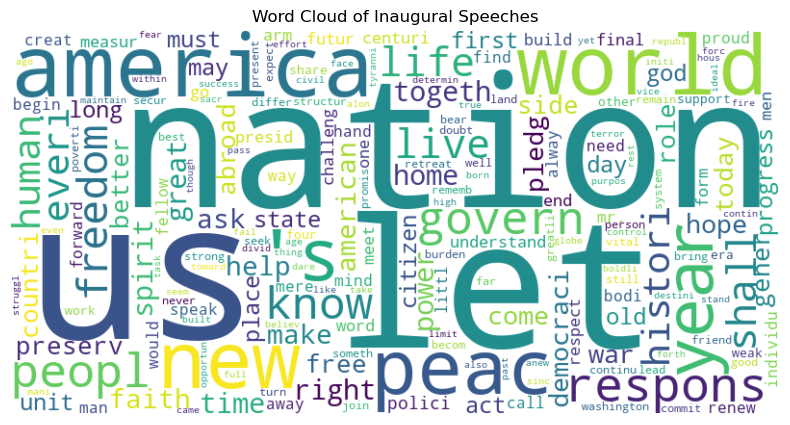

In [5]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Inaugural Speeches")
plt.show()